In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

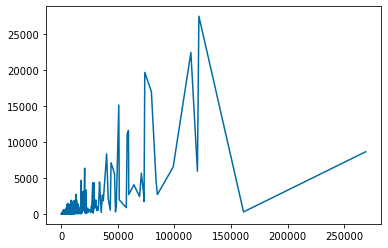

In [2]:
df=pd.read_csv("./udemy_course.csv")
xpoints=df["num_subscribers"]
ypoints=df["num_reviews"]
plt.style.use("tableau-colorblind10")
plt.plot(xpoints,ypoints)
plt.show

In [3]:
cdf = df[['course_id','num_subscribers','num_reviews','price','content_duration','num_lectures','Rating']]
cdf['Rating'] = cdf['Rating']* 100
cdf

C:\Users\VISHNU SRIYA\AppData\Local\Temp\ipykernel_6460\15521704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['Rating'] = cdf['Rating']* 100


,course_id,num_subscribers,num_reviews,price,content_duration,num_lectures,Rating
0,41295.0,268923.0,8629.0,0.0,10.5,45.0,82.0
1,59014.0,161029.0,279.0,0.0,3.5,27.0,69.0
2,625204.0,121584.0,27445.0,200.0,43.0,342.0,89.0
3,173548.0,120291.0,5924.0,0.0,3.0,30.0,78.0
4,764164.0,114512.0,22412.0,200.0,30.5,304.0,55.0
...,...,...,...,...,...,...,...
1200,1227578.0,50.0,5.0,200.0,5.0,60.0,96.0
1201,1277924.0,44.0,0.0,40.0,8.5,68.0,15.0
1202,1248172.0,34.0,2.0,125.0,1.5,21.0,46.0
1203,1250934.0,25.0,4.0,100.0,12.5,66.0,67.0


In [4]:
cdf.isnull().sum()

course_id           2
num_subscribers     2
num_reviews         2
price               2
content_duration    2
num_lectures        2
Rating              2
dtype: int64

In [5]:
for feature in ['num_subscribers' , 'content_duration', 'num_reviews', 'num_lectures','price','course_id','Rating']:
    cdf[feature].fillna(cdf[feature].mean(),inplace=True)
cdf.isnull().sum()

C:\Users\VISHNU SRIYA\AppData\Local\Temp\ipykernel_6460\226442790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf[feature].fillna(cdf[feature].mean(),inplace=True)


course_id           0
num_subscribers     0
num_reviews         0
price               0
content_duration    0
num_lectures        0
Rating              0
dtype: int64

In [6]:
cdf[cdf.duplicated()]

,course_id,num_subscribers,num_reviews,price,content_duration,num_lectures,Rating
405,706874.73483,6635.024938,357.355777,77.036575,5.586658,52.767249,64.305071


In [7]:
cf = cdf.drop_duplicates()
cf

,course_id,num_subscribers,num_reviews,price,content_duration,num_lectures,Rating
0,41295.0,268923.0,8629.0,0.0,10.5,45.0,82.0
1,59014.0,161029.0,279.0,0.0,3.5,27.0,69.0
2,625204.0,121584.0,27445.0,200.0,43.0,342.0,89.0
3,173548.0,120291.0,5924.0,0.0,3.0,30.0,78.0
4,764164.0,114512.0,22412.0,200.0,30.5,304.0,55.0
...,...,...,...,...,...,...,...
1200,1227578.0,50.0,5.0,200.0,5.0,60.0,96.0
1201,1277924.0,44.0,0.0,40.0,8.5,68.0,15.0
1202,1248172.0,34.0,2.0,125.0,1.5,21.0,46.0
1203,1250934.0,25.0,4.0,100.0,12.5,66.0,67.0


In [8]:
cf[cf.duplicated()]

,course_id,num_subscribers,num_reviews,price,content_duration,num_lectures,Rating


In [9]:
# # dff = pd.cf(np.random.randn(100, 2))
# msk = np.random.rand(len(cf)) < 0.8
# train = cf[msk]
# train


In [10]:
# test = cf[~msk]
# test

In [11]:
# from sklearn import linear_model
# regr = linear_model.LinearRegression()
# x = np.asanyarray(train[['num_subscribers','num_reviews','price','content_duration','num_lectures']])
# y = np.asanyarray(train[['Rating']])
# regr.fit (x, y)
# # The coefficients
# print ('Coefficients: ', regr.coef_)

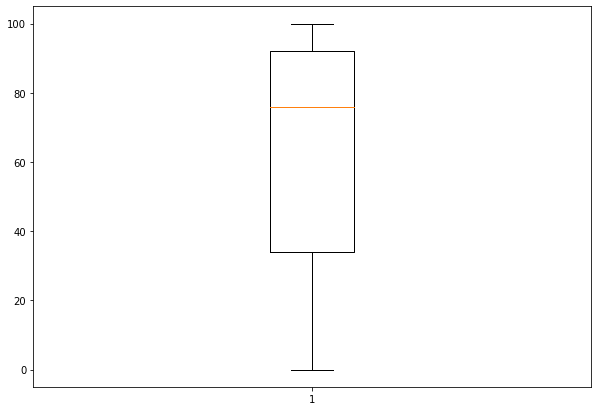

In [12]:
np.random.seed(10)
data = cf['Rating']
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

In [18]:
# a = df
# b = 'num_subscribers'
def outliers(df,ft):
    q1 = df[ft].quantile(0.25)
    q2 = df[ft].quantile(0.75)
    iqr = q2-q1
    l = q1 - 1.5 * iqr
    u = q2 + 1.5 * iqr
    ls = df.index[(df[ft]<l) | (df[ft] > u)]
    return ls

In [19]:
index_list= []
for feature in ['num_subscribers' , 'content_duration', 'num_reviews', 'num_lectures']:
    index_list.extend(outliers(cf, feature))
index_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 2,
 4,
 9,
 13,
 19,
 21,
 29,
 32,
 33,
 37,
 39,
 41,
 44,
 53,
 54,
 58,
 80,
 88,
 91,
 102,
 104,
 122,
 131,
 161,
 169,
 188,
 196,
 204,
 218,
 219,
 231,
 234,
 243,
 247,
 266,
 267,
 273,
 281,
 285,
 292,
 302,
 304,
 315,
 318,
 333,
 336,
 344,
 364,
 368,
 375,
 390,
 393,
 417,
 426,
 431,
 443,
 493,
 494,
 506,
 516,
 521,
 529,
 546,
 550,
 560,
 563,
 568,
 573,
 595,
 631,
 681,
 687,
 696,
 699,
 708,
 723,
 754,
 763,
 777,
 788,
 800,
 810

In [20]:
def remov(df, ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [21]:
df_cleaned = remov(cf,index_list)
df_cleaned

,course_id,num_subscribers,num_reviews,price,content_duration,num_lectures,Rating
109,1146014.0,15276.0,167.0,200.0,1.5,19.0,58.0
112,654680.0,15106.0,31.0,75.0,1.5,16.0,47.0
114,283014.0,15064.0,237.0,135.0,1.5,15.0,50.0
115,1027342.0,14842.0,131.0,200.0,1.0,17.0,88.0
117,269638.0,14606.0,235.0,150.0,3.0,21.0,48.0
...,...,...,...,...,...,...,...
1200,1227578.0,50.0,5.0,200.0,5.0,60.0,96.0
1201,1277924.0,44.0,0.0,40.0,8.5,68.0,15.0
1202,1248172.0,34.0,2.0,125.0,1.5,21.0,46.0
1203,1250934.0,25.0,4.0,100.0,12.5,66.0,67.0


In [22]:
# index_list= []
# for feature in ['num_subscribers' , 'content_duration', 'num_reviews', 'num_lectures']:
#     index_list.extend(outliers(df_cleaned, feature))
# dff = remove(df_cleaned,index_list)
# dff

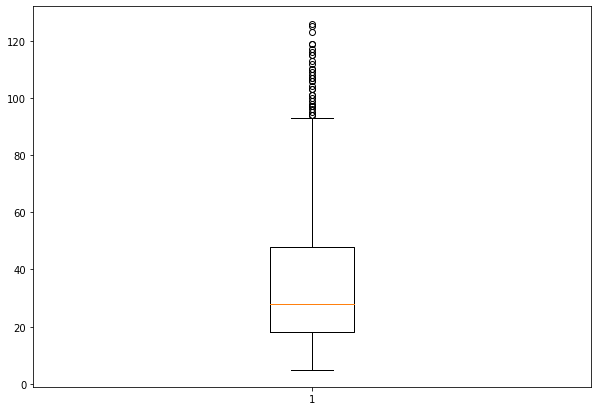

In [23]:
np.random.seed(10)
data = df_cleaned['num_lectures']
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

In [24]:
x=df_cleaned.drop(['Rating'],axis=1).values
y=df_cleaned['Rating'].values

In [25]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=100)

In [26]:
from sklearn.model_selection import train_test_split
X = df_cleaned.drop(columns = 'Rating',axis = 1)
Y = df_cleaned["Rating"]
print(X)
print(Y)

      course_id  num_subscribers  num_reviews  price  content_duration  \
109   1146014.0          15276.0        167.0  200.0               1.5   
112    654680.0          15106.0         31.0   75.0               1.5   
114    283014.0          15064.0        237.0  135.0               1.5   
115   1027342.0          14842.0        131.0  200.0               1.0   
117    269638.0          14606.0        235.0  150.0               3.0   
...         ...              ...          ...    ...               ...   
1200  1227578.0             50.0          5.0  200.0               5.0   
1201  1277924.0             44.0          0.0   40.0               8.5   
1202  1248172.0             34.0          2.0  125.0               1.5   
1203  1250934.0             25.0          4.0  100.0              12.5   
1204  1270222.0             19.0          2.0  200.0               4.0   

      num_lectures  
109           19.0  
112           16.0  
114           15.0  
115           17.0  
117   

In [27]:
# y_pred= regressor.predict(x_test)
# print('Train Score: ', regressor.score(standardized_train, Y_train))  
# print('Test Score: ', regressor.score(standardized_test, Y_test))

In [83]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regressor = RandomForestRegressor(n_estimators=100)
# regressor= LinearRegression()  
regressor.fit(x_train, y_train)
y_pred= regressor.predict(x_test)
print('Train Score: ', regressor.score(x_train, y_train)*100)  
# print('Test Score: ', regressor.score(x_test, y_test))  
regressor.predict([[59014.0,161029.0,279.0,0.0,3.5,27.0]])

Train Score:  88.37700833131036


array([59.34])